In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
##         https://www.youtube.com/watch?v=YncZ0WwxyzU&t=331s


DATA CLEANING

In [2]:
df.shape

(5572, 5)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.duplicated().sum()

403

In [8]:
df=df.drop_duplicates(keep='first')

In [9]:
df.duplicated().sum()

0

In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.shape

(5169, 2)

EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

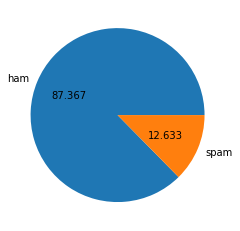

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.3f")
plt.show()


In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.453279,13.324793,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.947185,1.362406,1.0,1.0,1.0,2.0,28.0


In [28]:
#lets see the pattern of HAM messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#lets see the pattern of SPAM messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
#so from both the describptions above we can see that for HAM messages the mean of the characters is 70, whereas for 
#SPAM the mean is 137. So we can assume that for SPAM messages the number of characters are generally more

In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

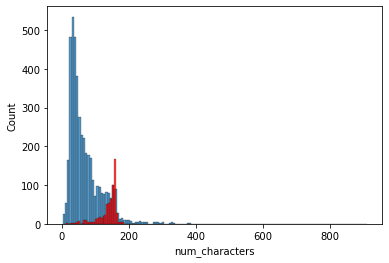

In [32]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:>

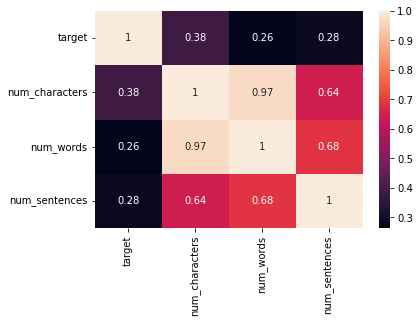

In [33]:

sns.heatmap(df.corr(),annot=True)

In [34]:
#lets use stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# Data Preprocessing steps
Lower case,
Tokenization,
Removing special characters,
Removing stop words and punctuation,
Stemming

In [37]:
def transform_text(text):
    
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    
    
    
            
    

In [38]:
transform_text('SPAM the mean@#%?? how are sun lovely girls Nah I dont lovely')

'spam mean sun love girl nah dont love'

In [39]:
df['transformed_text']=df['text'].apply(transform_text)

In [40]:
!pip install wordcloud

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create the WordCloud object
wc = WordCloud()


In [66]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [68]:
len(spam_corpus)

9939

In [70]:
from collections import Counter
Counter(spam_corpus).most_common(30)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [79]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


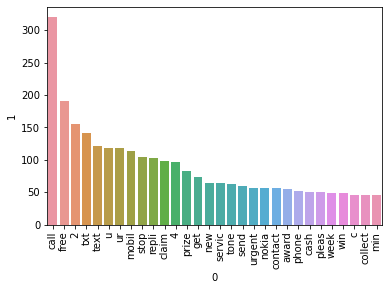

In [83]:
#lets check the 30 most common words in spam
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [85]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


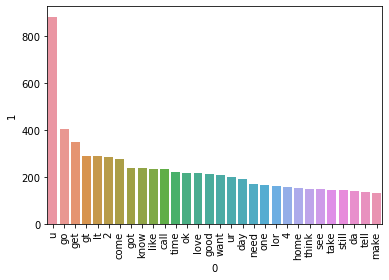

In [97]:
#lets check the 30 most common words in HAM
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


# MODEL TRAINING

In [171]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [172]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [125]:
#lets check first with CountVectorizer

In [101]:
cv=CountVectorizer()

In [102]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [103]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [104]:
y=df['target'].values

In [105]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [115]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix

In [116]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [122]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

print(" GNB accuracy score:", accuracy_score(y_test,y_pred1))

print("confusion matrix:",confusion_matrix(y_test,y_pred1))

print("precision score:",precision_score(y_test,y_pred1))



 GNB accuracy score: 0.8800773694390716
confusion matrix: [[792 104]
 [ 20 118]]
precision score: 0.5315315315315315


In [123]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

print("MNB accuracy score:", accuracy_score(y_test,y_pred2))

print("confusion matrix:",confusion_matrix(y_test,y_pred2))

print("precision score:",precision_score(y_test,y_pred2))


MNB accuracy score: 0.9642166344294004
confusion matrix: [[871  25]
 [ 12 126]]
precision score: 0.8344370860927153


In [132]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

print("BNB accuracy score:", accuracy_score(y_test,y_pred3))

print("confusion matrix:",confusion_matrix(y_test,y_pred3))

print("precision score:",precision_score(y_test,y_pred3))

BNB accuracy score: 0.9700193423597679
confusion matrix: [[893   3]
 [ 28 110]]
precision score: 0.9734513274336283


In [126]:
#lets check second with TFIDF Vectorizer

In [133]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(" GNB accuracy score:", accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("-------------------------------------------------------")

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("MNB accuracy score:", accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision score:",precision_score(y_test,y_pred2))
print("-------------------------------------------------------")

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("BNB accuracy score:", accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision score:",precision_score(y_test,y_pred3))



 GNB accuracy score: 0.8762088974854932
confusion matrix: [[793 103]
 [ 25 113]]
precision score: 0.5231481481481481
-------------------------------------------------------
MNB accuracy score: 0.9593810444874274
confusion matrix: [[896   0]
 [ 42  96]]
precision score: 1.0
-------------------------------------------------------
BNB accuracy score: 0.9700193423597679
confusion matrix: [[893   3]
 [ 28 110]]
precision score: 0.9734513274336283


In [134]:
#For us here we need to reduce FALSE POSITIVE as much as possible, so precision is very important
#Using tfidf vectorizer with multinomial Naive baise gives a precision of 1 of 100 percent which is veru good

In [135]:
#lets comparethe precision of naive baise with other classifier algorithmns

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [137]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [138]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [139]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [140]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [141]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968


In [146]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [147]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [148]:
#so from here it seems that naive baiyes with tfidf and mnb is giving the best precision and 
#accuracy, so we will go ahead with that
#NOW, lets try to improve the acuuracy of naive baiyes with tfidf and mn
#we will start with changing the max_feature hyperparameter of tfidf

In [149]:
tfidf=TfidfVectorizer(max_features=3000)  # 3000 cam from trial and error, we started with 1000 words, then 2000, then 3000
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(" GNB accuracy score:", accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("-------------------------------------------------------")

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("MNB accuracy score:", accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision score:",precision_score(y_test,y_pred2))
print("-------------------------------------------------------")

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("BNB accuracy score:", accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision score:",precision_score(y_test,y_pred3))


 GNB accuracy score: 0.8694390715667312
confusion matrix: [[788 108]
 [ 27 111]]
precision score: 0.5068493150684932
-------------------------------------------------------
MNB accuracy score: 0.9709864603481625
confusion matrix: [[896   0]
 [ 30 108]]
precision score: 1.0
-------------------------------------------------------
BNB accuracy score: 0.9835589941972921
confusion matrix: [[895   1]
 [ 16 122]]
precision score: 0.991869918699187


In [150]:
#NOW WE CAN SEE for Naive baise tfidf mnb, earlier the acuuracy was 95 percent,now
#it increased to 97 percent which is a good increase

In [151]:
#NOw we will do one more thing, earlier the X value was not scaled,lets try to scale it
#it may give some better result

In [153]:
#eearlier the values were like this
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [154]:
#importing min max scaler
#we cannot use standard scaler, AS STANDARD SCALER ALSO GIVES NEGATIVE VALUES
#AND IT IS NOT ACCEPTED BY NAIVE BAIS
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(" GNB accuracy score:", accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("-------------------------------------------------------")

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("MNB accuracy score:", accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision score:",precision_score(y_test,y_pred2))
print("-------------------------------------------------------")

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("BNB accuracy score:", accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision score:",precision_score(y_test,y_pred3))

 GNB accuracy score: 0.8723404255319149
confusion matrix: [[782 114]
 [ 18 120]]
precision score: 0.5128205128205128
-------------------------------------------------------
MNB accuracy score: 0.9787234042553191
confusion matrix: [[889   7]
 [ 15 123]]
precision score: 0.9461538461538461
-------------------------------------------------------
BNB accuracy score: 0.9835589941972921
confusion matrix: [[895   1]
 [ 16 122]]
precision score: 0.991869918699187


In [156]:
# now we can see that using min max scaler, accuracy increased a bit but
#PRECISION decreaed to 94 percent (with mnb) which is not good

In [162]:
#NEXT we can use voting classifier to improve the accuracy, voting classifier is a combination
#of different algorithmns

In [158]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [159]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [160]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [161]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9606299212598425


In [163]:
#AGAIN precision has decreased which is not good

In [165]:
#NEXT is applying stacking,stacking is similar to voting BUT,
#unlike voting classifier where all the algorithm has similar weigtage,in stacking the weightage is
#decided for the algorithmns using a final estimator, which is Random forest in this case
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [167]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [168]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [169]:
#SO again, the PRECISION has decreased which is not good

In [178]:
#Again Running the codes for mnb
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
tfidf=TfidfVectorizer(max_features=3000)  # 3000 cam from trial and error, 
#we started with 1000 words, then 2000, then 3000 and in 3000 we are getting best accuracy
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("MNB accuracy score:", accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision score:",precision_score(y_test,y_pred2))

MNB accuracy score: 0.9709864603481625
confusion matrix: [[896   0]
 [ 30 108]]
precision score: 1.0


In [179]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))